In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load Gemini responses
df_answers = pd.read_csv("/content/drive/MyDrive/Thesis/gemini_answers/gemini_gemini_responses_nov2022.csv")

# Load full tweet metadata
df_meta = pd.read_csv("/content/drive/MyDrive/Thesis/classification_datasets_cleaned/tweets_election_nov2022_bot_vs_random.csv")

<ipython-input-28-60786c2c892c>:7: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv("/content/drive/MyDrive/Thesis/classification_datasets_cleaned/tweets_election_nov2022_bot_vs_random.csv")


In [ ]:
# Filter rows with missing or empty clean_text
missing_clean_text = df_meta[df_meta['clean_text'].isna() | (df_meta['clean_text'].str.strip() == '')]

# Display relevant columns
missing_clean_text_display = missing_clean_text[['tweet_id', 'user_id', 'clean_text', 'tweet_text']]

# Show results
print(f"Number of rows with missing or empty clean_text: {len(missing_clean_text_display)}")
missing_clean_text_display.head()

Number of rows with missing or empty clean_text: 12


,tweet_id,user_id,clean_text,tweet_text
1878,1556987800255434754,1459532693759311873,NaN,https://t.co/I3k0dxrtiM
2029,1557259322295459840,1459532693759311873,NaN,https://t.co/RHbftiwYdq
4504,1560626015990317058,1459532693759311873,NaN,https://t.co/L9z3NQ2Xyq
4505,1560626215651872769,1459532693759311873,NaN,https://t.co/bQGshNhb06
14052,1568253763193901056,1475583508781441029,NaN,https://t.co/x0AdvdBhBo


In [ ]:
df_answers

,user_id,tweet_id,is_bot,Minimal Prompt Response,Full-Feature Prompt Response
0,14628294,1576105640967036928,True,כן\n,לא\n
1,1535734767693533185,1587830198694813696,False,לא\n,לא\n
2,1259693465035780096,1567218427026178055,True,כן\n,כן\n
3,1410979696347652105,1559284748857577475,False,Error: Quota exceeded after retries,Error: Quota exceeded after retries
4,1583923141986091008,1587538636047646720,True,לא\n,כן\n
...,...,...,...,...,...
995,986646252778639367,1567782591322791936,False,כן\n,לא\n
996,1583909627535982592,1587446428158201856,True,כן\n,Error: Quota exceeded after retries
997,29256831,1579392587865427968,False,Error: Quota exceeded after retries,כן\n
998,1583918605590491136,1587511829701357570,True,כן\n,כן\n


In [ ]:
# Merge on user_id + tweet_id
df = pd.merge(df_answers, df_meta[['user_id', 'tweet_id', 'clean_text']], on=['user_id', 'tweet_id'], how='left')
df

,user_id,tweet_id,is_bot,Minimal Prompt Response,Full-Feature Prompt Response,clean_text
0,14628294,1576105640967036928,True,כן\n,לא\n,"ולא, זה לא בגלל שרוסיה מדינה וחיזבאללה ארגון ט..."
1,1535734767693533185,1587830198694813696,False,לא\n,לא\n,<MENTION> <MENTION> שלא לדבר על שאלות רחבות יו...
2,1259693465035780096,1567218427026178055,True,כן\n,כן\n,<MENTION> אבל העובדה היא שאף חבר כנסת ערבי מוס...
3,1410979696347652105,1559284748857577475,False,Error: Quota exceeded after retries,Error: Quota exceeded after retries,ככ הרבה שעות על העבודה בתאטרון🥲🥲
4,1583923141986091008,1587538636047646720,True,לא\n,כן\n,#לאחוזריםלעבר אל תבלבלו זה לא מועט מאוד של אנש...
...,...,...,...,...,...,...
995,986646252778639367,1567782591322791936,False,כן\n,לא\n,<MENTION> ועוד הייתה ברשימת ימינה לכנסת. מאיפה...
996,1583909627535982592,1587446428158201856,True,כן\n,Error: Quota exceeded after retries,נתניהו באמת הוכיח שהוא לא יחסוך שום מאמץ כדי ל...
997,29256831,1579392587865427968,False,Error: Quota exceeded after retries,כן\n,<MENTION> <MENTION> ישראל מפציצה באופן חסר אבח...
998,1583918605590491136,1587511829701357570,True,כן\n,כן\n,אם זה היה במדינה אחרת נתניהו צריכה להיות בבית ...


In [ ]:
# Look for rows in df_answers that did not get clean_text after merge
missing_after_merge = df[df['clean_text'].isna()]
print(f"Unmatched rows after merge: {len(missing_after_merge)}")
missing_after_merge[['user_id', 'tweet_id']].head()


Unmatched rows after merge: 0


,user_id,tweet_id


In [ ]:
df_before = df.copy()

In [ ]:
import numpy as np

# List of columns with Gemini responses
response_columns = [
    'Minimal Prompt Response',
    'Full-Feature Prompt Response'
]

# Convert Hebrew "כן" and "לא" into binary values
def process_response(response):
    if isinstance(response, str):
        response = response.strip().replace('\n', ' ')
        response = response.lstrip("*").strip().lower()
        if "error: quota exceeded" in response:
            return np.nan  # Drop from evaluation
        if response.startswith("לא"):
            return 0
        elif response.startswith("כן"):
            return 1
        else:
            print("Unrecognized response:", response)
    return np.nan

# Apply processing
for col in response_columns:
    df[col] = df[col].apply(process_response)

# Map is_bot column to binary if needed
df['is_bot'] = df['is_bot'].map({True: 1, False: 0, 'TRUE': 1, 'FALSE': 0}).astype(float)

# Drop rows with all NaN in responses
df = df.dropna(subset=response_columns, how='all')

df

,user_id,tweet_id,is_bot,Minimal Prompt Response,Full-Feature Prompt Response,clean_text
0,14628294,1576105640967036928,1,1,0,"ולא, זה לא בגלל שרוסיה מדינה וחיזבאללה ארגון ט..."
1,1535734767693533185,1587830198694813696,0,0,0,<MENTION> <MENTION> שלא לדבר על שאלות רחבות יו...
2,1259693465035780096,1567218427026178055,1,1,1,<MENTION> אבל העובדה היא שאף חבר כנסת ערבי מוס...
4,1583923141986091008,1587538636047646720,1,0,1,#לאחוזריםלעבר אל תבלבלו זה לא מועט מאוד של אנש...
5,1444961790996189184,1588237826550034433,0,0,0,<MENTION> הריסוק היחיד בינתיים הוא של הכאילו ש...
...,...,...,...,...,...,...
995,986646252778639367,1567782591322791936,0,1,0,<MENTION> ועוד הייתה ברשימת ימינה לכנסת. מאיפה...
996,1583909627535982592,1587446428158201856,1,1,NaN,נתניהו באמת הוכיח שהוא לא יחסוך שום מאמץ כדי ל...
997,29256831,1579392587865427968,0,NaN,1,<MENTION> <MENTION> ישראל מפציצה באופן חסר אבח...
998,1583918605590491136,1587511829701357570,1,1,1,אם זה היה במדינה אחרת נתניהו צריכה להיות בבית ...


In [ ]:
for col in response_columns:
    n_errors = df[col].isna().sum()
    print(f"{col}: {n_errors} quota errors or invalid responses")

Minimal Prompt Response: 122 quota errors or invalid responses
Full-Feature Prompt Response: 112 quota errors or invalid responses


In [ ]:
both_failed = df[response_columns].isna().all(axis=1).sum()
print(f"Rows where both prompts failed: {both_failed}")
minimal_only_failed = df['Minimal Prompt Response'].isna() & df['Full-Feature Prompt Response'].notna()
full_only_failed = df['Full-Feature Prompt Response'].isna() & df['Minimal Prompt Response'].notna()

print(f"Only Minimal Prompt failed: {minimal_only_failed.sum()}")
print(f"Only Full-Feature Prompt failed: {full_only_failed.sum()}")

Rows where both prompts failed: 0
Only Minimal Prompt failed: 122
Only Full-Feature Prompt failed: 112


In [ ]:
for col in response_columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))


Minimal Prompt Response:
Minimal Prompt Response
1      483
0      361
NaN    122
Name: count, dtype: int64

Full-Feature Prompt Response:
Full-Feature Prompt Response
1      475
0      379
NaN    112
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store metrics per prompt
results = {}

for col in response_columns:
    # Drop rows where this column or label is missing
    valid_rows = df.dropna(subset=[col, 'is_bot'])
    y_true = valid_rows['is_bot']
    y_pred = valid_rows[col]

    # Store metrics
    results[col] = {
        'Accuracy (%)': accuracy_score(y_true, y_pred) * 100,
        'Precision (%)': precision_score(y_true, y_pred, zero_division=0) * 100,
        'Recall (%)': recall_score(y_true, y_pred, zero_division=0) * 100,
        'F1-score (%)': f1_score(y_true, y_pred, zero_division=0) * 100,
        'N Samples': len(valid_rows)
    }

# Combine metrics into DataFrame
metrics_df = pd.DataFrame(results).T.round(2)
metrics_df

,Accuracy (%),Precision (%),Recall (%),F1-score (%),N Samples
Minimal Prompt Response,48,48,55,51,844
Full-Feature Prompt Response,67,66,72,69,854


<Figure size 1000x700 with 0 Axes>

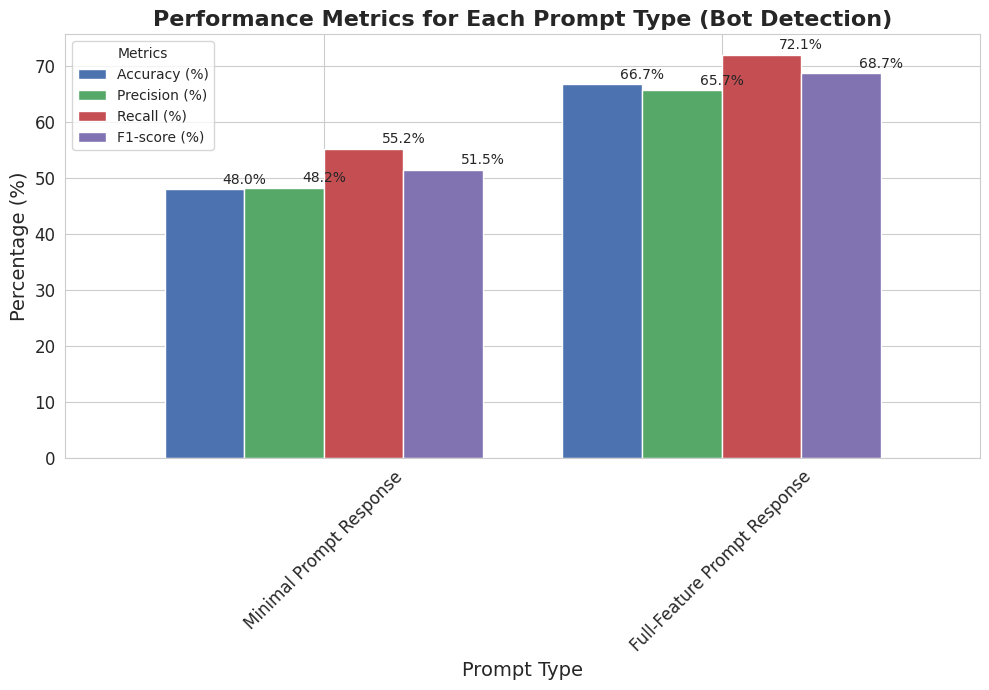

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop N Samples before plotting
metrics_to_plot = metrics_df.drop(columns=["N Samples"])

# Set style and colors
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the plot
plt.figure(figsize=(10, 7))
metrics_to_plot.plot(
    kind='bar',
    width=0.8,
    figsize=(10, 7),
    color=['#4c72b0', '#55a868', '#c44e52', '#8172b2']
)

# Title and labels
plt.title('Performance Metrics for Each Prompt Type (Bot Detection)', fontsize=16, fontweight='bold')
plt.xlabel('Prompt Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Metrics', loc='upper left', fontsize=10)

# Add values on top of bars
for i, col in enumerate(metrics_to_plot.columns):
    for index, value in enumerate(metrics_to_plot[col]):
        plt.text(index + i / 5 - 0.2, value + 1, f'{value:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

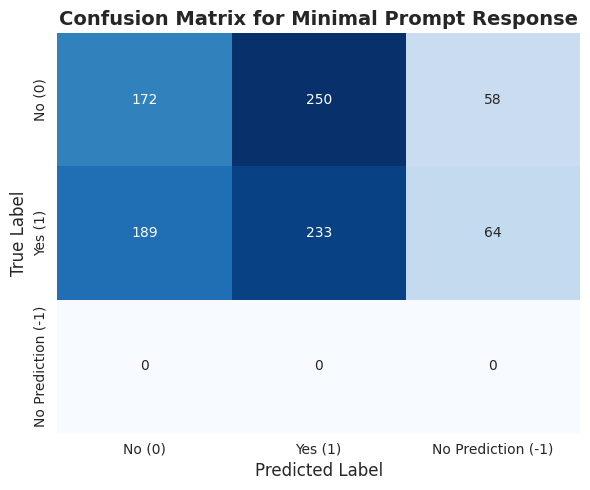

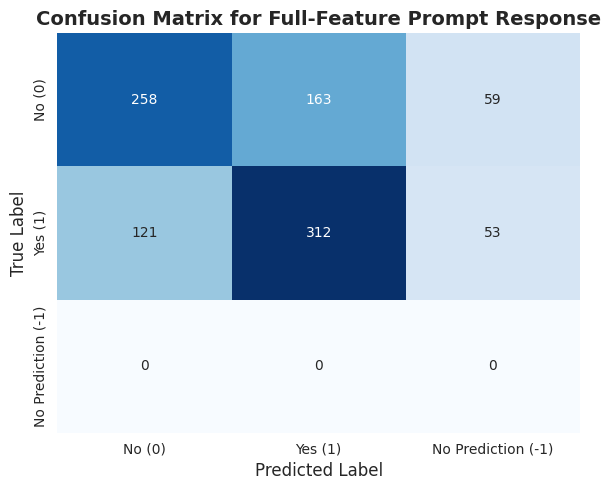

In [ ]:
from sklearn.metrics import confusion_matrix

# Loop through each prompt column
for col in response_columns:
    y_true = df['is_bot']
    y_pred = df[col].fillna(-1)  # Treat missing predictions as -1

    # Compute confusion matrix with label order
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1, -1])

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No (0)', 'Yes (1)', 'No Prediction (-1)'],
                yticklabels=['No (0)', 'Yes (1)', 'No Prediction (-1)'])
    plt.title(f'Confusion Matrix for {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
# Create predictions column safely
selected_prompt = "Full-Feature Prompt Response"
df.loc[:, "pred"] = df[selected_prompt].fillna(-1)

# Extract False Negatives (actual bot, predicted not bot)
false_negatives = df[(df["is_bot"] == 1) & (df["pred"] == 0)].copy()

# Extract False Positives (actual not bot, predicted bot)
false_positives = df[(df["is_bot"] == 0) & (df["pred"] == 1)].copy()

# Select relevant columns for export
columns_to_save = ["user_id", "tweet_id", "clean_text", selected_prompt]

# Save to CSV
false_negatives[columns_to_save].to_csv("/content/drive/MyDrive/Thesis/FN_FP/false_negatives.csv", index=False, encoding='utf-8-sig')
false_positives[columns_to_save].to_csv("/content/drive/MyDrive/Thesis/FN_FP/false_positives.csv", index=False, encoding='utf-8-sig')

print("Files saved to Thesis/FN_FP/")

Files saved to Thesis/FN_FP/
